Question 2)

In [13]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


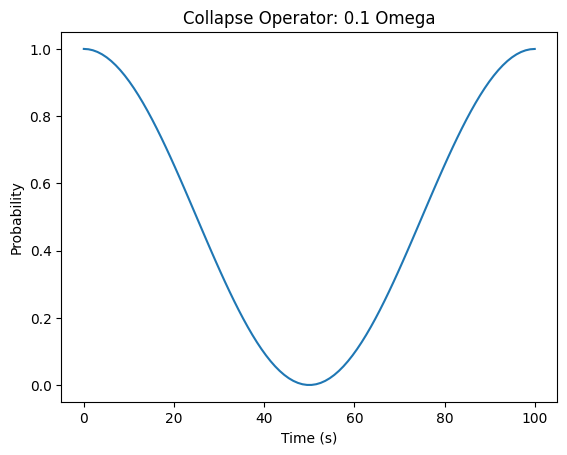

In [15]:
# alpha
delta = 0 
omega = 2*np.pi
h_bar = 1.05457*10**-34
alpha = 0.1*omega

H = -(delta/2)*sigmaz()+(omega/2)*sigmax()

rho = ket2dm(basis(2,1))
t = np.linspace(0,100,100)
c_ops = np.sqrt(h_bar*alpha)*sigmaz()

solve = mesolve(H,rho,t,c_ops=c_ops)
states = solve.states
rho_t = [expect(rho,state) for state in states]

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Collapse Operator: 0.1 Omega")
plt.plot(t,rho_t)
plt.show()

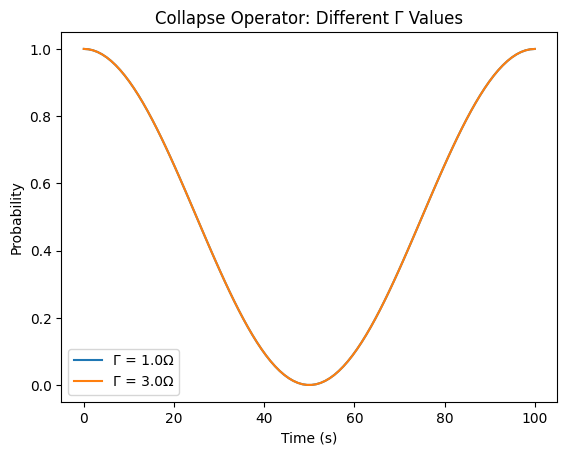

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import sigmax, sigmaz, basis, ket2dm, mesolve, expect

delta = 0 
omega = 2 * np.pi
h_bar = 1.05457 * 10**-34
alpha = 0.1 * omega

H = -(delta / 2) * sigmaz() + (omega / 2) * sigmax()

rho = ket2dm(basis(2, 1))
t = np.linspace(0, 100, 100)

# Define collapse operators for different values of Γ
gamma_values = [omega, 3 * omega]
c_ops_list = [np.sqrt(h_bar * alpha) * sigmaz() for _ in gamma_values]

# Plot for each Γ value
for i, c_ops in enumerate(c_ops_list):
    solve = mesolve(H, rho, t, c_ops=c_ops)
    states = solve.states
    rho_t = [expect(rho, state) for state in states]

    plt.plot(t, rho_t, label=f"Γ = {gamma_values[i] / omega}Ω")

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Collapse Operator: Different Γ Values")
plt.legend()
plt.show()


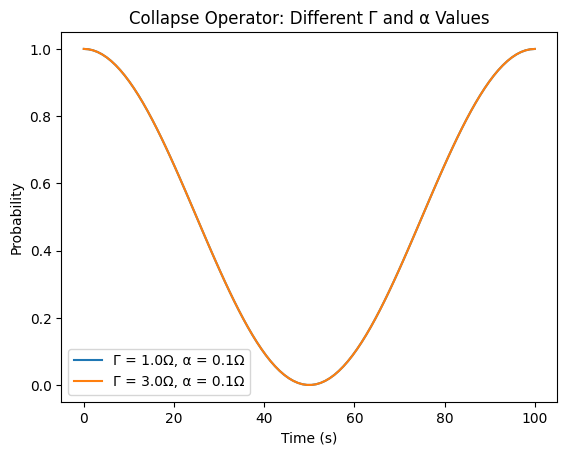

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import sigmax, sigmaz, basis, ket2dm, mesolve, expect

delta = 0 
omega = 2 * np.pi
h_bar = 1.05457 * 10**-34
alpha = 0.1 * omega

H = -(delta / 2) * sigmaz() + (omega / 2) * sigmax()

rho = ket2dm(basis(2, 1))
t = np.linspace(0, 100, 100)

# Define alpha and collapse operators for different values of Γ
alpha_values = [0.1 * omega]
gamma_values = [omega, 3 * omega]

for alpha in alpha_values:
    c_ops_list = [np.sqrt(h_bar * alpha) * sigmaz() for _ in gamma_values]

    # Plot for each Γ value
    for i, c_ops in enumerate(c_ops_list):
        solve = mesolve(H, rho, t, c_ops=c_ops)
        states = solve.states
        rho_t = [expect(rho, state) for state in states]

        plt.plot(t, rho_t, label=f"Γ = {gamma_values[i] / omega}Ω, α = {alpha / omega}Ω")

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Collapse Operator: Different Γ and α Values")
plt.legend()
plt.show()

Total run time:   0.02s


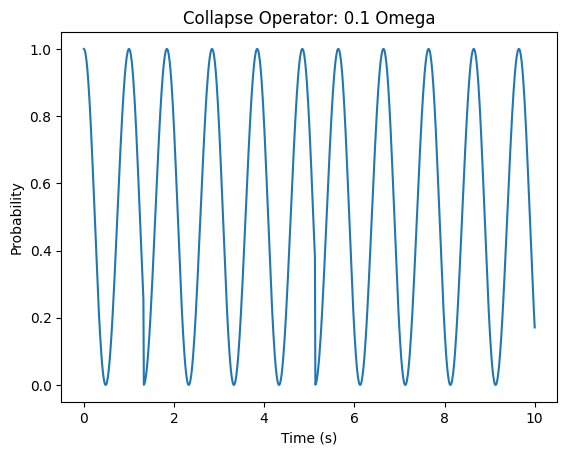

In [66]:
# Alpha = 0.1 Omega
delta = 0 
omega = 2*np.pi
alpha = 0.1*omega
sz = sigmaz()
a = destroy(2)
H = -(delta/2)*sigmaz()+(omega/2)*sigmax()

rho = basis(2,1)
t = np.linspace(0,10,1000)
c_ops = np.sqrt(alpha)*sigmaz()

solve = mcsolve(H,rho,t,[np.sqrt(alpha) * a], [a.dag() * a, sz.dag() * sz], ntraj=1)

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Collapse Operator: 0.1 Omega")
plt.plot(t,solve.expect[0])
plt.show()

Total run time:   0.01s
10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.06s. Est. time left: 00:00:00:00
40.0%. Run time:   0.06s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.06s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
80.0%. Run time:   0.06s. Est. time left: 00:00:00:00
90.0%. Run time:   0.06s. Est. time left: 00:00:00:00
100.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.07s
10.0%. Run time:   0.29s. Est. time left: 00:00:00:02
20.0%. Run time:   0.49s. Est. time left: 00:00:00:01
30.0%. Run time:   0.68s. Est. time left: 00:00:00:01
40.0%. Run time:   0.91s. Est. time left: 00:00:00:01
50.0%. Run time:   1.12s. Est. time left: 00:00:00:01
60.0%. Run time:   1.31s. Est. time left: 00:00:00:00
70.0%. Run time:   1.54s. Est. time left: 00:00:00:00
80.0%. Run time:   1.73s. Est. ti

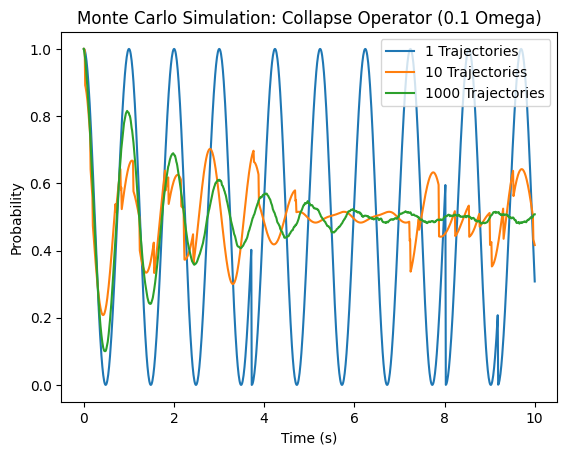

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import sigmax, sigmaz, basis, destroy, mcsolve

delta = 0 
omega = 2 * np.pi
alpha = 0.1 * omega
sz = sigmaz()
a = destroy(2)
H = -(delta / 2) * sigmaz() + (omega / 2) * sigmax()

rho = basis(2, 1)
t = np.linspace(0, 10, 1000)
c_ops = np.sqrt(alpha) * sigmaz()

# List of trajectory numbers
ntraj_values = [1, 10, 1000]

# Plot for each trajectory number
for ntraj in ntraj_values:
    solve = mcsolve(H, rho, t, [np.sqrt(alpha) * a], [a.dag() * a, sz.dag() * sz], ntraj=ntraj)
    plt.plot(t, solve.expect[0], label=f'{ntraj} Trajectories')

plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title("Monte Carlo Simulation: Collapse Operator (0.1 Omega)")
plt.legend()
plt.show()


Question 1

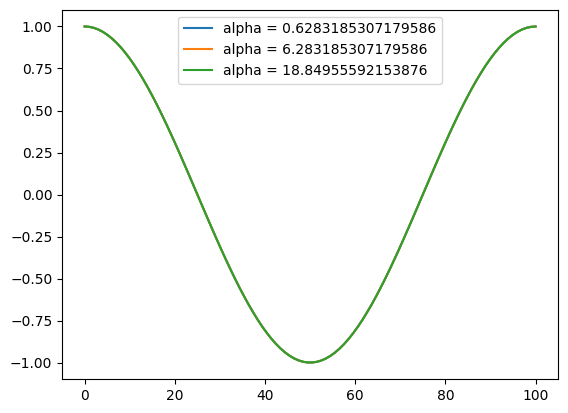

In [37]:
import qutip as qt

delta = 0  # detuning
Omega = 2 * np.pi  # Rabi frequency
alpha_vals = [0.1 * Omega, Omega, 3 * Omega]  # phase noise strengths
t_max = 100  # maximum time
steps = 100  # number of time steps
hbar= 1.05457e-34 
sigmaz = qt.sigmaz()
sigmax = qt.sigmax()

H = - delta / 2 * sigmaz + Omega / 2 * sigmax
c_ops = [np.sqrt(hbar * alpha) * sigmaz for alpha in alpha_vals]

psi0 = qt.basis(2, 0)  # ground state

for alpha, c_op in zip(alpha_vals, c_ops):
    times = np.linspace(0, t_max, steps)
    result = qt.mesolve(H, psi0, times, c_ops=[c_op])
    excited_state_pop = qt.expect(sigmaz, result.states)
    plt.plot(times, excited_state_pop, label=f"alpha = {alpha}")

plt.legend()
plt.show()


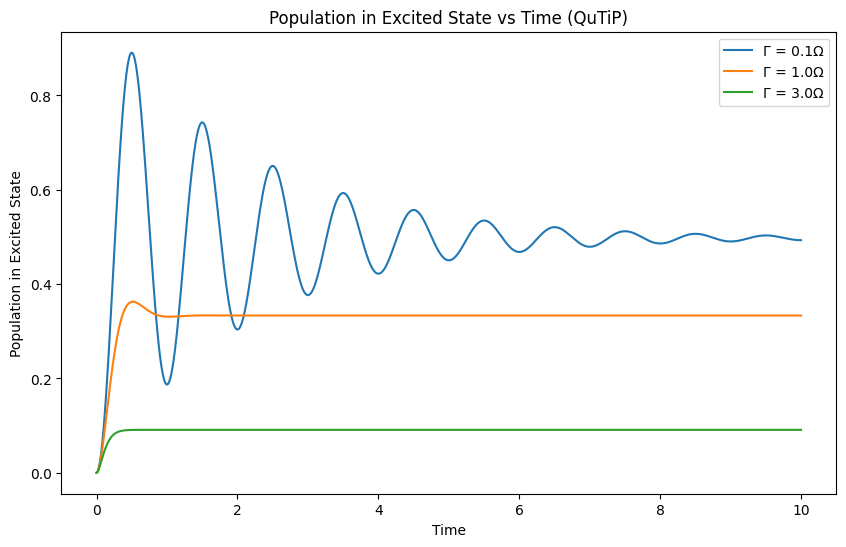

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
Delta = 0
Omega = 2 * np.pi
time_range = np.linspace(0, 10, 10000)  # Adjust the time range as needed

# Operators
sz = sigmaz()
sx = sigmax()
sm = destroy(2)

# Hamiltonian
H = -Delta/2 * sz + Omega/2 * sx

# Lindblad operators
Gamma_values = [0.1 * Omega, Omega, 3 * Omega]

# Function to solve OBEs for a given Gamma
def solve_obe(Gamma):
    # Lindblad operator
    L = np.sqrt(Gamma) * sm
    
    # Initial state (ground state)
    psi0 = basis(2, 0)
    
    # Time evolution using mesolve
    result = mesolve(H, psi0, time_range, [np.sqrt(Gamma) * sm], [sz, sx, sm.dag() * sm])
    
    # Extract the population in the excited state
    population_excited = result.expect[2]
    return population_excited

# Plot the results for different values of Gamma
plt.figure(figsize=(10, 6))
for Gamma in Gamma_values:
    population_excited = solve_obe(Gamma)
    plt.plot(time_range, population_excited, label=f'Γ = {Gamma/Omega:.1f}Ω')

plt.title('Population in Excited State vs Time (QuTiP)')
plt.xlabel('Time')
plt.ylabel('Population in Excited State')
plt.legend()
plt.show()


In [ ]:
pip install pandas

In [3]:
import csv

# Specify the path to your CSV file
csv_file_path = '/Users/shreyupadhyay/Downloads/Untitled spreadsheet - Ba133_SRdata.csv'

# Create a list to store the data
data_list = []

# Use the csv.reader to read the data from the file
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Iterate over the rows and append to the data list
    for row in csv_reader:
        timestamp, value = map(float, row)
        data_list.append((timestamp, value))

# Print the resulting data list
print(data_list)


[(3701.396844, 6692.0), (3710.441814, 6810.0), (3720.869837, 6738.0), (3730.021237, 6675.0), (3740.219984, 6979.0), (3750.824338, 6709.0), (3760.348283, 6708.0), (3770.047435, 6753.0), (3780.381024, 6817.0), (3789.932628, 6847.0), (3800.786698, 6638.0), (3810.791837, 6890.0), (3820.516906, 6887.0), (3830.22067, 6895.0), (3841.476879, 6662.0), (3850.51099, 6625.0), (3860.894202, 6767.0), (3870.90118, 6700.0), (3880.008099, 6645.0), (3890.852048, 6896.0), (3900.724319, 6559.0), (3910.092813, 6660.0), (3920.149202, 6667.0), (3930.210379, 6947.0), (3940.620208, 6691.0), (3949.756554, 6782.0), (3960.198244, 6721.0), (3969.421138, 6631.0), (3979.191546, 6553.0), (3989.697807, 6755.0), (3999.82657, 6502.0), (4010.52057, 6533.0), (4019.523067, 6533.0), (4028.992051, 6239.0), (4039.229647, 5937.0), (4049.468813, 5487.0), (4059.603101, 5706.0), (4068.258876, 5589.0), (4079.092019, 5364.0), (4089.948102, 5734.0), (4099.901302, 6438.0), (4108.855239, 6589.0), (4120.357594, 6666.0), (4130.046981, 6

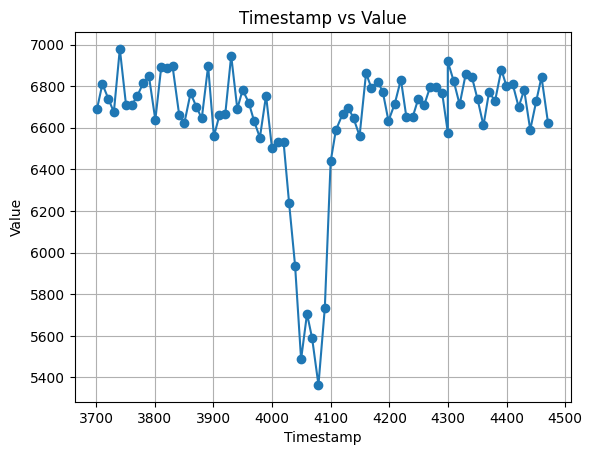

In [4]:
timestamps = []
values = []

# Use the csv.reader to read the data from the file
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Iterate over the rows and append to the timestamp and values lists
    for row in csv_reader:
        timestamp, value = map(float, row)
        timestamps.append(timestamp)
        values.append(value)

# Plot the data
plt.plot(timestamps, values, marker='o', linestyle='-')
plt.title('Timestamp vs Value')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Flipping the graph

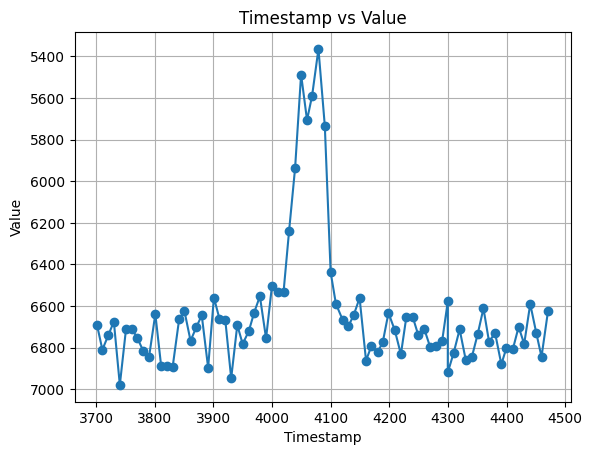

In [9]:
import csv
import matplotlib.pyplot as plt

timestamps = []
values = []

# Use the csv.reader to read the data from the file
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Iterate over the rows and append to the timestamp and values lists
    for row in csv_reader:
        timestamp, value = map(float, row)
        timestamps.append(timestamp)
        values.append(value)

# Plot the data
plt.plot(timestamps, values, marker='o', linestyle='-')
plt.title('Timestamp vs Value')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)

# Invert y-axis
plt.gca().invert_yaxis()

plt.show()


tests rough work

In [61]:
import numpy as np
from qutip import *

# Parameters
Delta = 0
Omega = 2 * np.pi
Gamma_values = [0.1 * Omega, Omega, 3 * Omega]

# Define operators
H = -0.5 * Delta * sigmaz() + 0.5 * Omega * (sigmax() + sigmay())
c_ops = [np.sqrt(Gamma) * sigmam() for Gamma in Gamma_values]

# Steady-state solver
def steady_state_solver(Gamma):
    rho_ss = steadystate(H, c_ops)
    Pe_ss = expect(sigmap() * sigmam(), rho_ss)
    return Pe_ss

# Function to calculate total photon scattering rate
def photon_scattering_rate(Delta, Gamma, s):
    Pe_ss = steady_state_solver(Gamma)
    rate = Gamma * Pe_ss * (1 + s) / (1 + s + Delta**2 / Gamma**2)
    return rate

# Calculate and print rates for different Gamma values
for Gamma in Gamma_values:
    s = 2 * Omega**2 / Gamma**2
    rate = photon_scattering_rate(Delta, Gamma, s)
    print(f'Total Photon Scattering Rate (Γ = {Gamma/Omega}): {rate}')


Total Photon Scattering Rate (Γ = 0.1): 0.060386211505810646
Total Photon Scattering Rate (Γ = 1.0): 0.6038621150581065
Total Photon Scattering Rate (Γ = 3.0): 1.8115863451743193


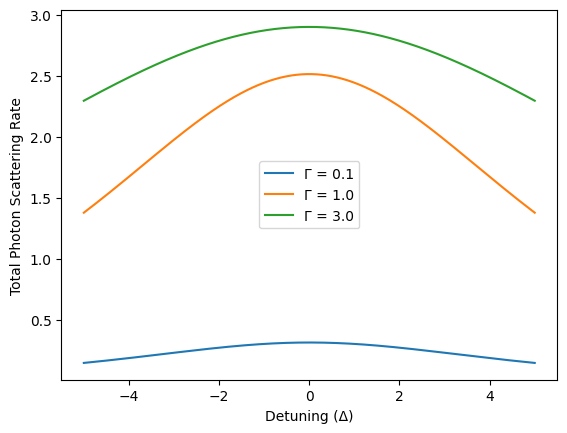

In [5]:

# Parameters
Delta = 0
Omega = 2 * np.pi
Gamma_values = [0.1 * Omega, Omega, 3 * Omega]

# Function to calculate total photon scattering rate
def photon_scattering_rate(Delta, Gamma, s):
    H = -0.5 * Delta * sigmaz() + 0.5 * Omega * (sigmax() + sigmay())
    c_ops = [np.sqrt(Gamma) * sigmam()]

    # Steady-state solver
    rho_ss = steadystate(H, c_ops)
    Pe_ss = expect(sigmap() * sigmam(), rho_ss)

    # Calculate total photon scattering rate
    rate = Gamma * Pe_ss * (1 + s) / (1 + s + Delta**2 / Gamma**2)
    return rate

# Time array for plotting (can be adjusted as needed)
Delta_values = np.linspace(-5, 5, 1000)

# Plotting for different Gamma values
for Gamma in Gamma_values:
    s = 2 * Omega**2 / Gamma**2
    rates = [photon_scattering_rate(D, Gamma, s) for D in Delta_values]
    plt.plot(Delta_values, rates, label=f'Γ = {Gamma/Omega}')

# Plot settings
plt.xlabel('Detuning (Δ)')
plt.ylabel('Total Photon Scattering Rate')
plt.legend()
plt.show()


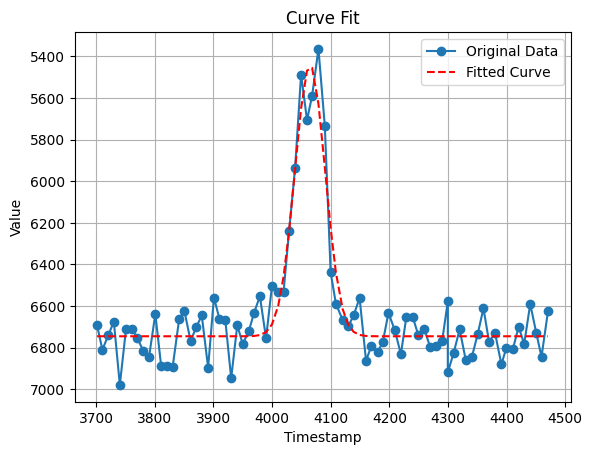

Optimal Gamma: 13.671817088270178
Optimal s: 38908812202.9527


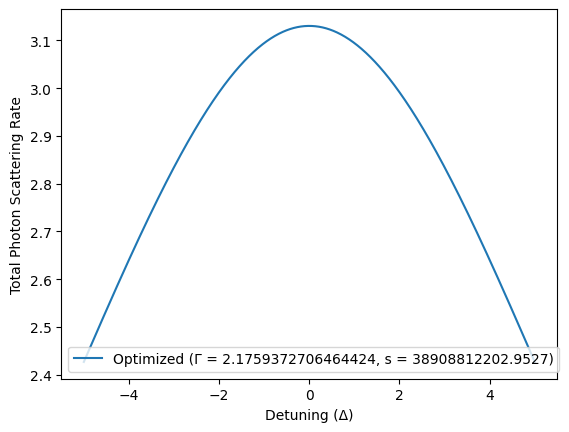

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.interpolate import interp1d
from qutip import *

# Program 1)
# Parameters
Delta = 0
Omega = 2 * np.pi
Gamma_values = [0.1 * Omega, Omega, 3 * Omega]

# Function to calculate total photon scattering rate
def photon_scattering_rate(Delta, Gamma, s):
    H = -0.5 * Delta * sigmaz() + 0.5 * Omega * (sigmax() + sigmay())
    c_ops = [np.sqrt(Gamma) * sigmam()]

    # Steady-state solver
    rho_ss = steadystate(H, c_ops)
    Pe_ss = expect(sigmap() * sigmam(), rho_ss)

    # Calculate total photon scattering rate
    rate = Gamma * Pe_ss * (1 + s) / (1 + s + Delta**2 / Gamma**2)
    return rate

# Time array for plotting (can be adjusted as needed)
Delta_values = np.linspace(-5, 5, 1000)

# Function to calculate rates for given Gamma and s
def calculate_rates(Gamma, s):
    return [photon_scattering_rate(D, Gamma, s) for D in Delta_values]

# Program 2)
# Load data from the second graph
timestamps = []
values = []

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        timestamp, value = map(float, row)
        timestamps.append(timestamp)
        values.append(value)

# Define the bell-shaped curve function (Gaussian)
def bell_curve(timestamp, a, b, c, d):
    return a * np.exp(-(timestamp - b)**2 / (2 * c**2)) + d

# Perform curve fit
initial_guess = [max(values), np.mean(timestamps), np.std(timestamps), min(values)]
params, covariance = curve_fit(bell_curve, timestamps, values, p0=initial_guess)

# Plot the original data
plt.plot(timestamps, values, marker='o', linestyle='-', label='Original Data')

# Plot the fitted curve
fitted_values = bell_curve(np.array(timestamps), *params)
plt.plot(timestamps, fitted_values, linestyle='--', color='red', label='Fitted Curve')

# Invert y-axis
plt.gca().invert_yaxis()

# Plot settings
plt.title('Curve Fit')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Optimize parameters for program 1)
# Function to minimize (difference between the two programs)
def minimize_difference(params):
    Gamma, s = params
    rates_program1 = calculate_rates(Gamma, s)

    # Interpolate fitted values to match the shape of rates_program1
    interp_fitted_values = interp1d(timestamps, fitted_values, kind='linear', fill_value='extrapolate')
    interpolated_fitted_values = interp_fitted_values(Delta_values)

    return np.sum((np.array(rates_program1) - interpolated_fitted_values)**2)

# Initial guess for gamma and s
initial_guess_params = [0.1 * Omega, 2 * Omega**2 / (0.1 * Omega)**2]

# Optimize parameters
result = minimize(minimize_difference, initial_guess_params, method='Nelder-Mead')

# Extract optimized parameters
optimal_gamma, optimal_s = result.x

# Print optimized parameters
print(f"Optimal Gamma: {optimal_gamma}")
print(f"Optimal s: {optimal_s}")

# Plot the optimized curve for program 1)
rates_optimized = calculate_rates(optimal_gamma, optimal_s)

plt.plot(Delta_values, rates_optimized, label=f'Optimized (Γ = {optimal_gamma/Omega}, s = {optimal_s})')
plt.xlabel('Detuning (Δ)')
plt.ylabel('Total Photon Scattering Rate')
plt.legend()
plt.show()
